In [295]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
# Loading the data
raw_data=pd.read_excel("Customer Conversion Prediction.xlsx")

In [246]:
raw_data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no


In [247]:
data=raw_data.copy()

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  float64
 1   job             45211 non-null  object 
 2   marital         45211 non-null  object 
 3   education_qual  45211 non-null  object 
 4   call_type       45211 non-null  object 
 5   day             45211 non-null  float64
 6   mon             45211 non-null  object 
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  object 
 10  y               45211 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.8+ MB


In [249]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [250]:
raw_data.isnull().count()

age               45211
job               45211
marital           45211
education_qual    45211
call_type         45211
day               45211
mon               45211
dur               45211
num_calls         45211
prev_outcome      45211
y                 45211
dtype: int64

### Data cleaning

In [251]:
data['dur']=data['dur'].astype(int)
data['age']=data['age'].astype(int)
data['day']=data['day'].astype(int)
data['num_calls']=data['num_calls'].astype(int)

In [252]:
# Droping the duplicate rows
data.drop_duplicates(inplace=True)

In [253]:
data['job'].replace({'admin.':'admin'},inplace=True)

### Exploratory Data Analysis

In [254]:
def visualisation(feature_1,feature_2):
    plt.figure(figsize=(17,12))
    feature_data=data[feature_1].value_counts()

    plt.subplot(2,1,1)
    plt.bar(feature_data.index,feature_data.values)
    plt.xlabel(feature_1)
    plt.ylabel("Count")
    plt.title(feature_1 + ' visualisation')


    plt.subplot(2,1,2)       
    sns.countplot(x=feature_1,hue=feature_2,data=data )
    plt.title(feature_1 +' Vs ' + feature_2 )


    plt.show()

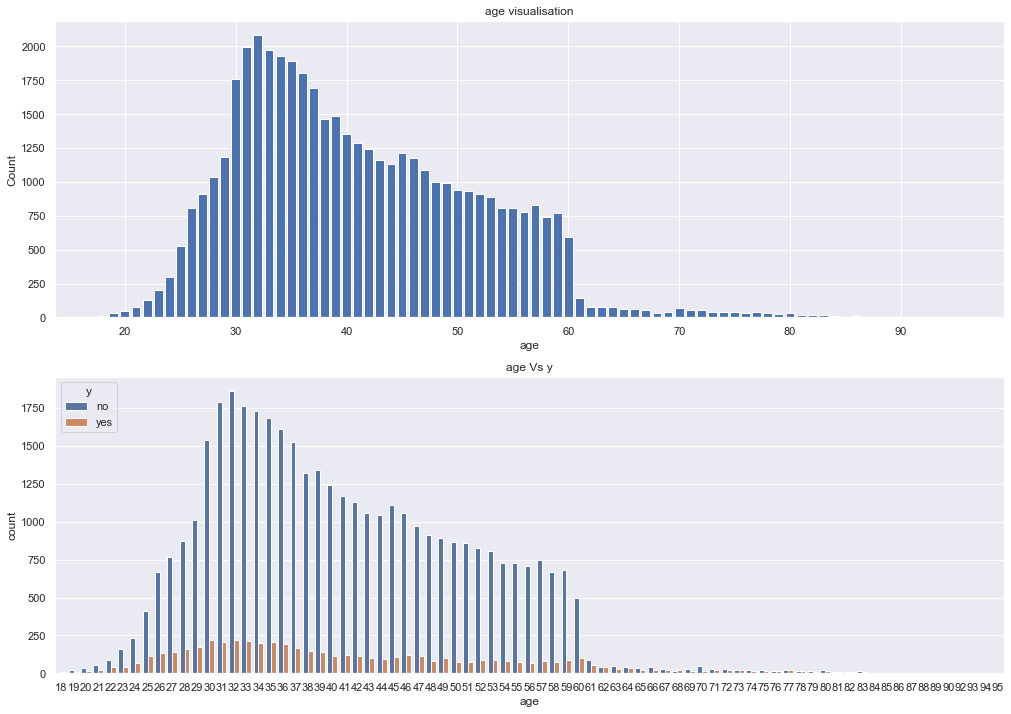

<AxesSubplot:xlabel='age'>

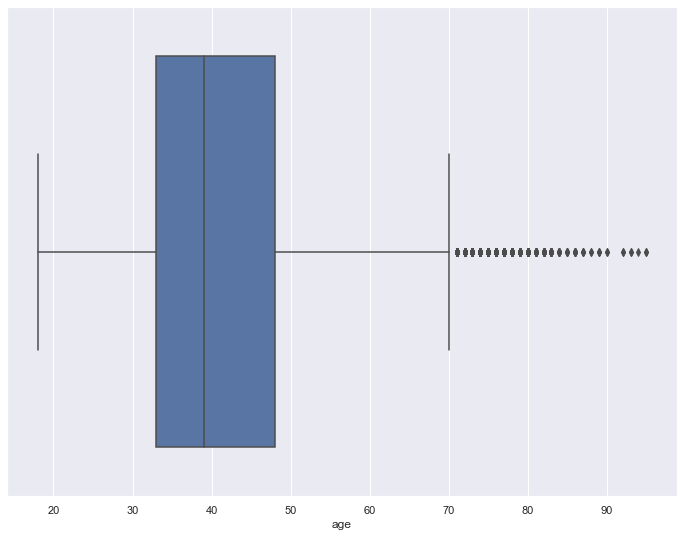

In [255]:
visualisation('age','y')
sns.boxplot(data['age'])

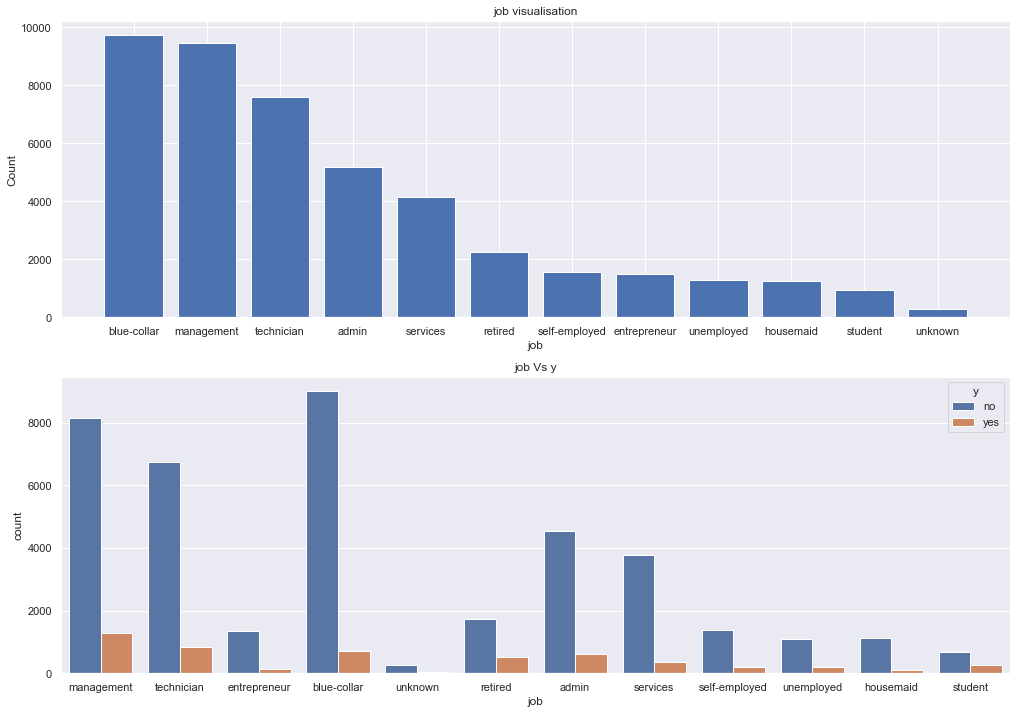

In [256]:
visualisation('job','y')

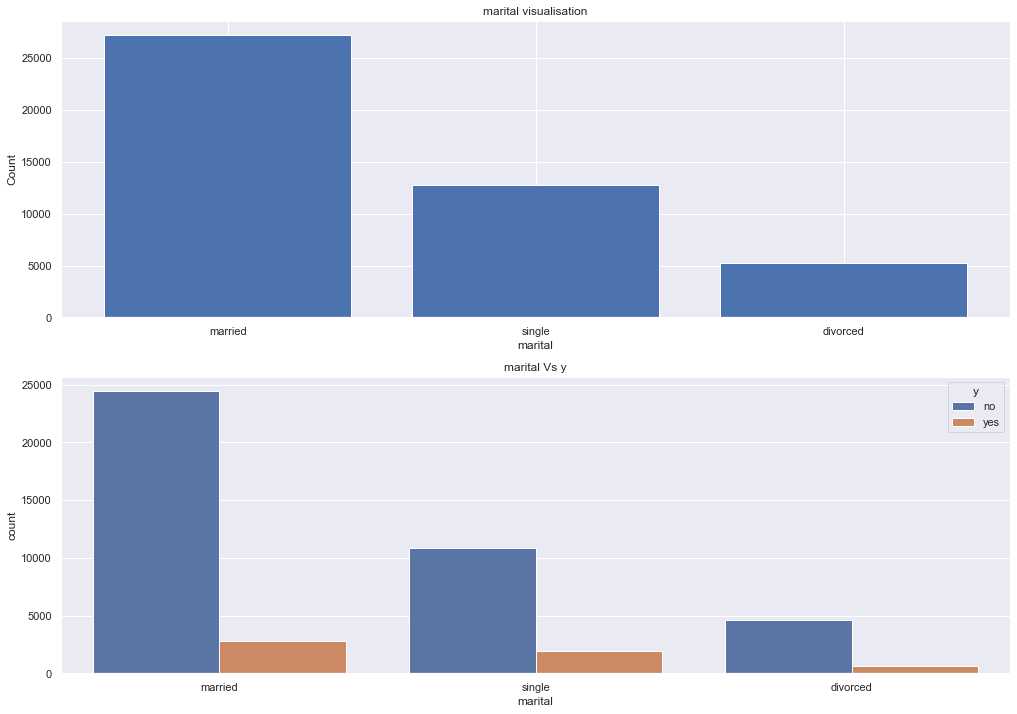

In [257]:
visualisation('marital','y')

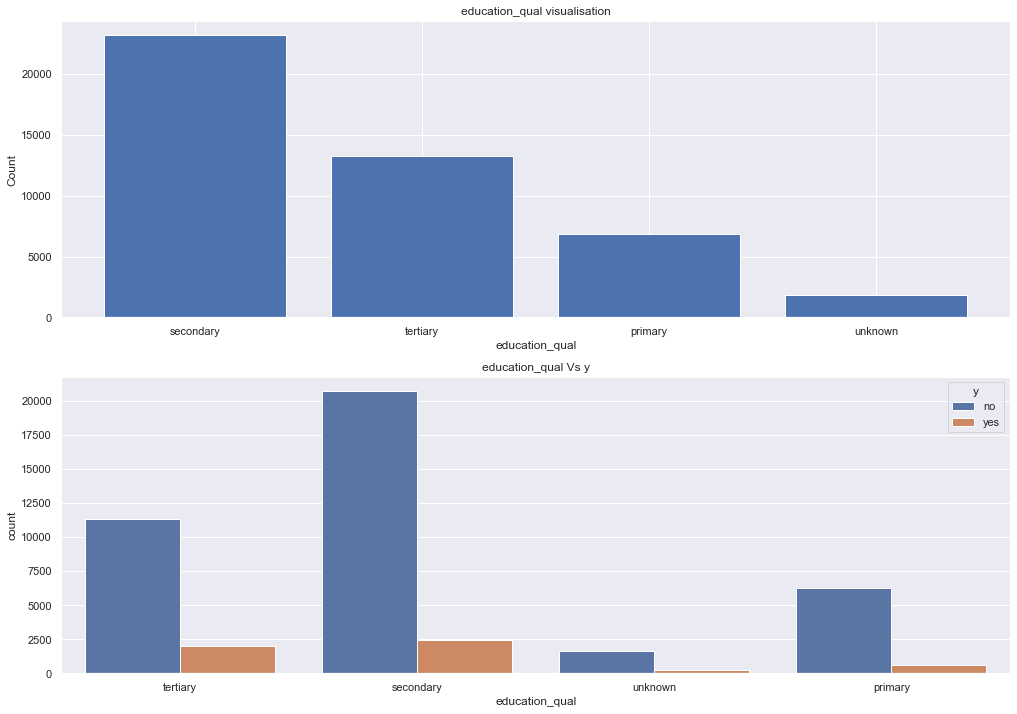

In [258]:
visualisation('education_qual','y')

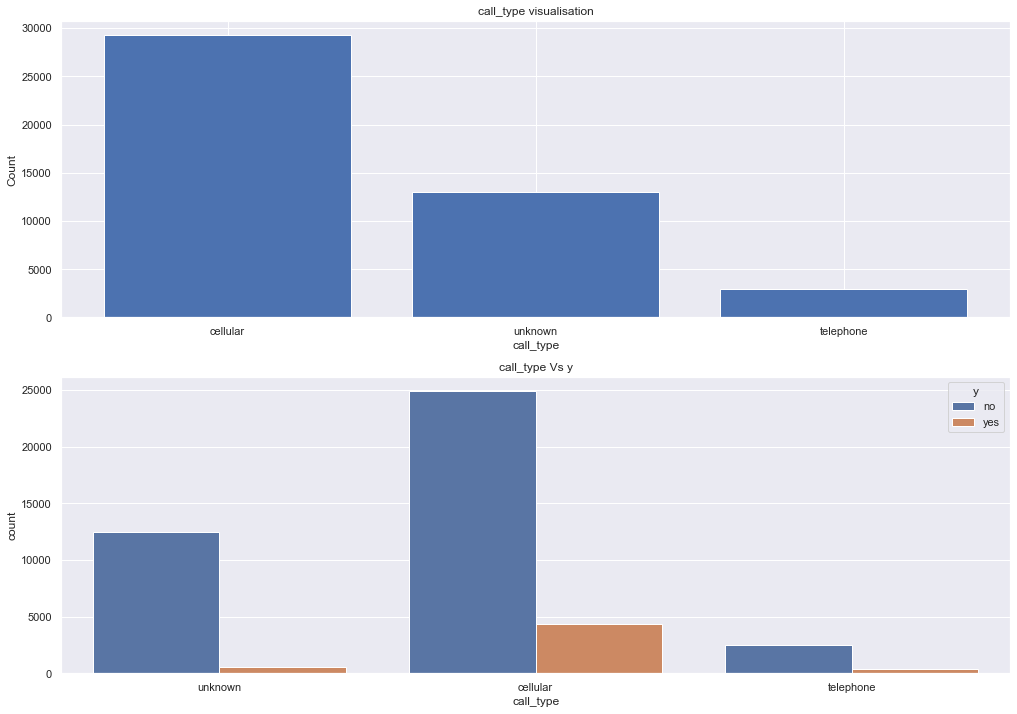

In [259]:
visualisation('call_type','y')

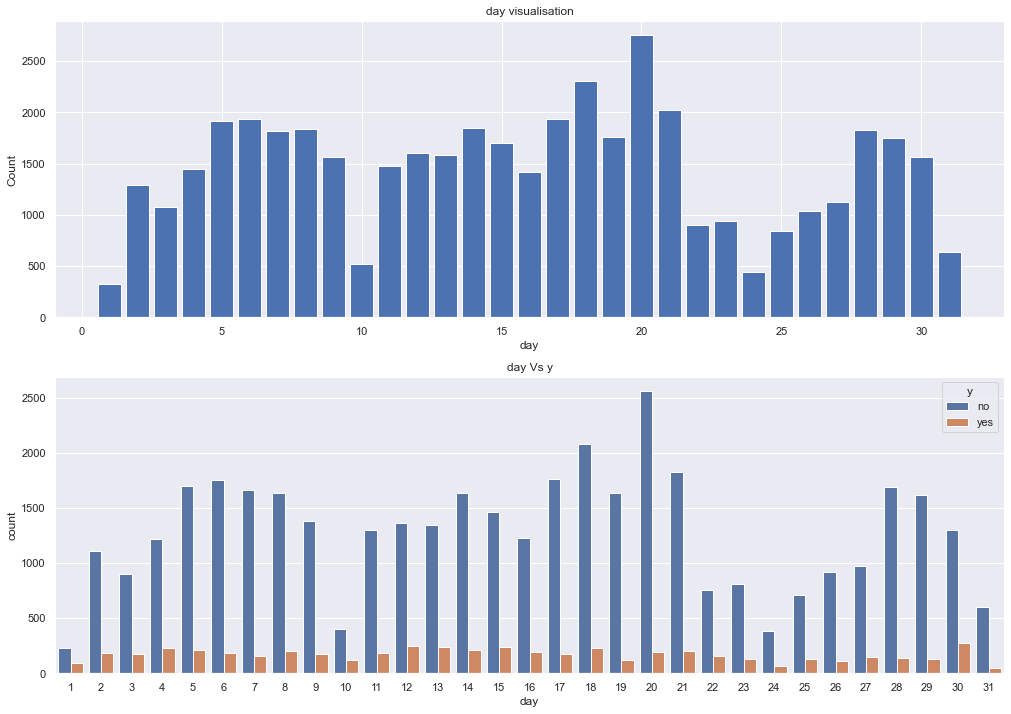

In [260]:
visualisation('day','y')

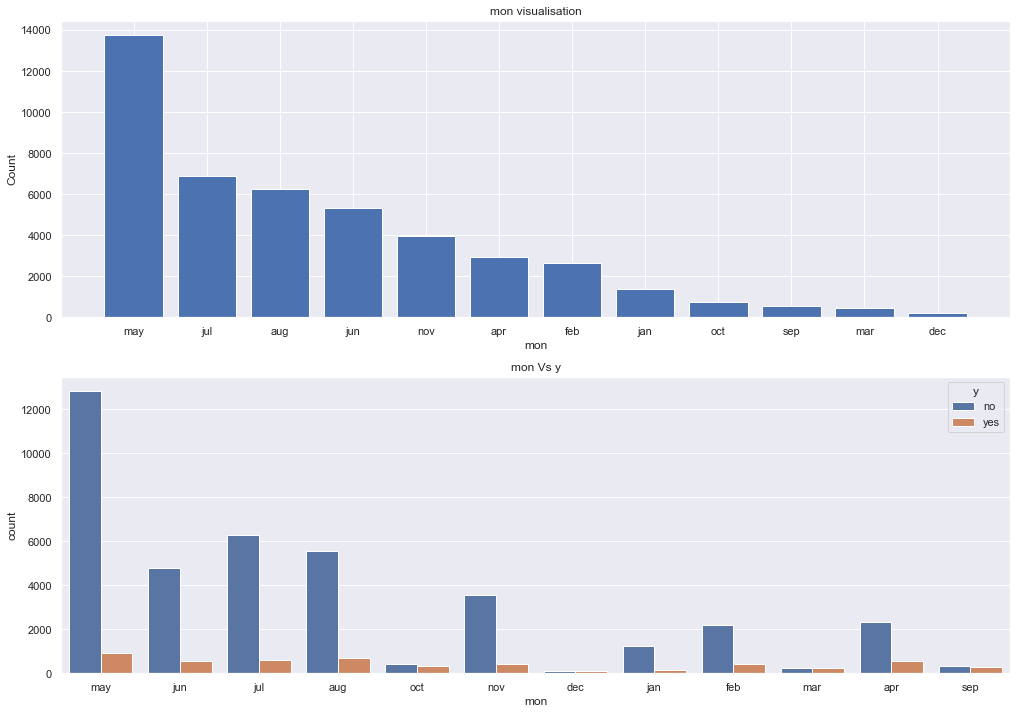

In [261]:
visualisation('mon','y')

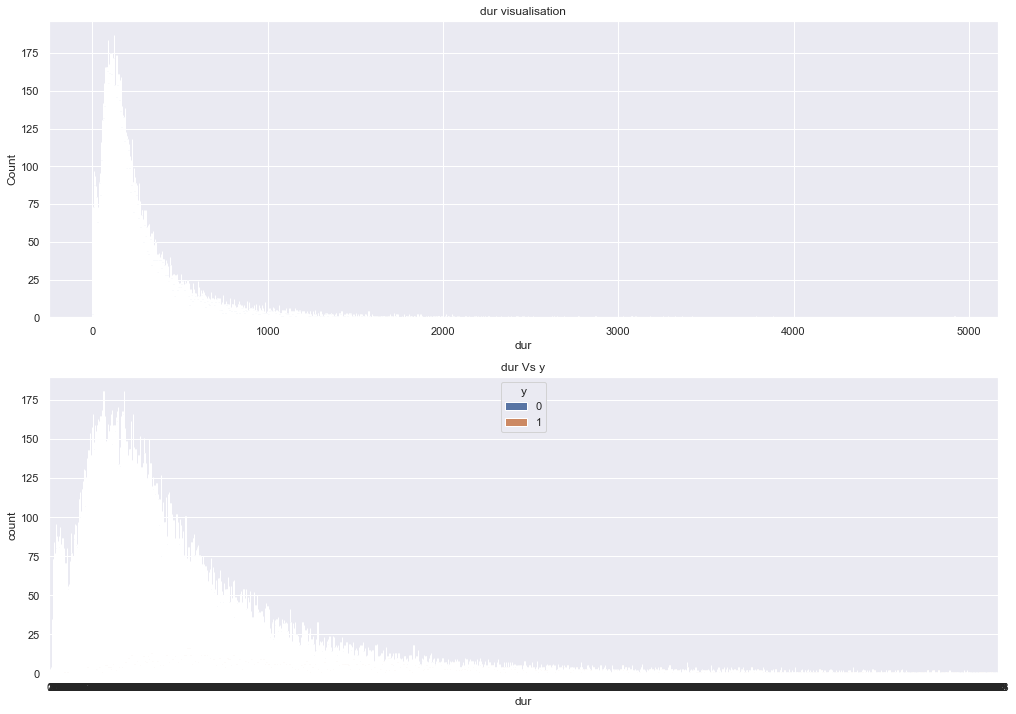

In [294]:
visualisation('dur','y')

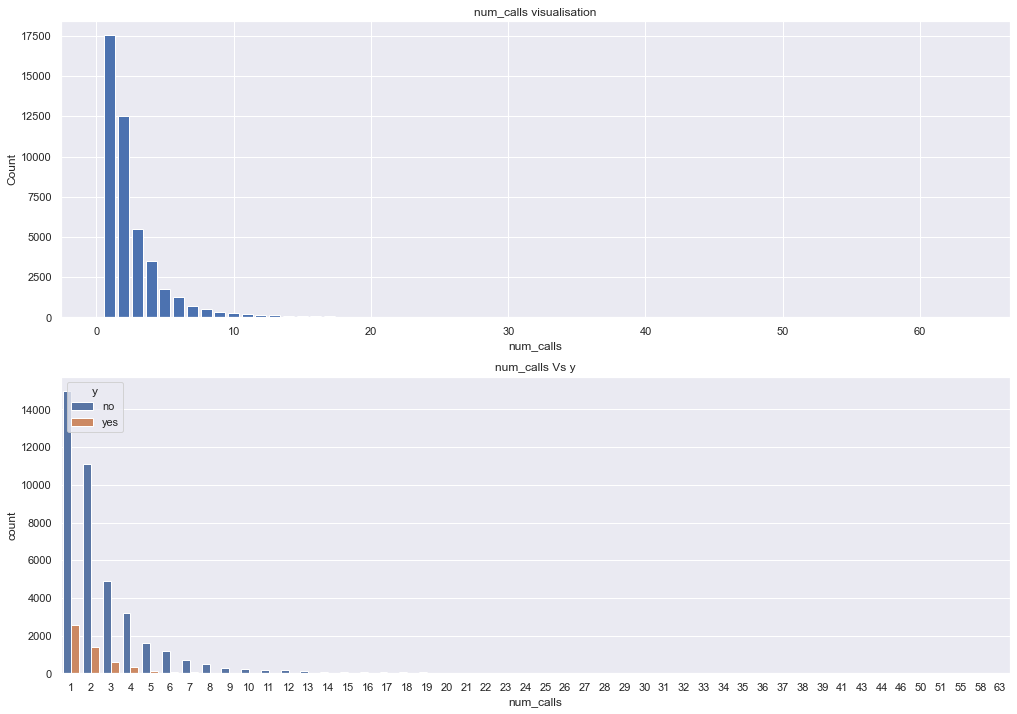

In [263]:
visualisation('num_calls','y')
#sns.boxplot(data['num_calls'])

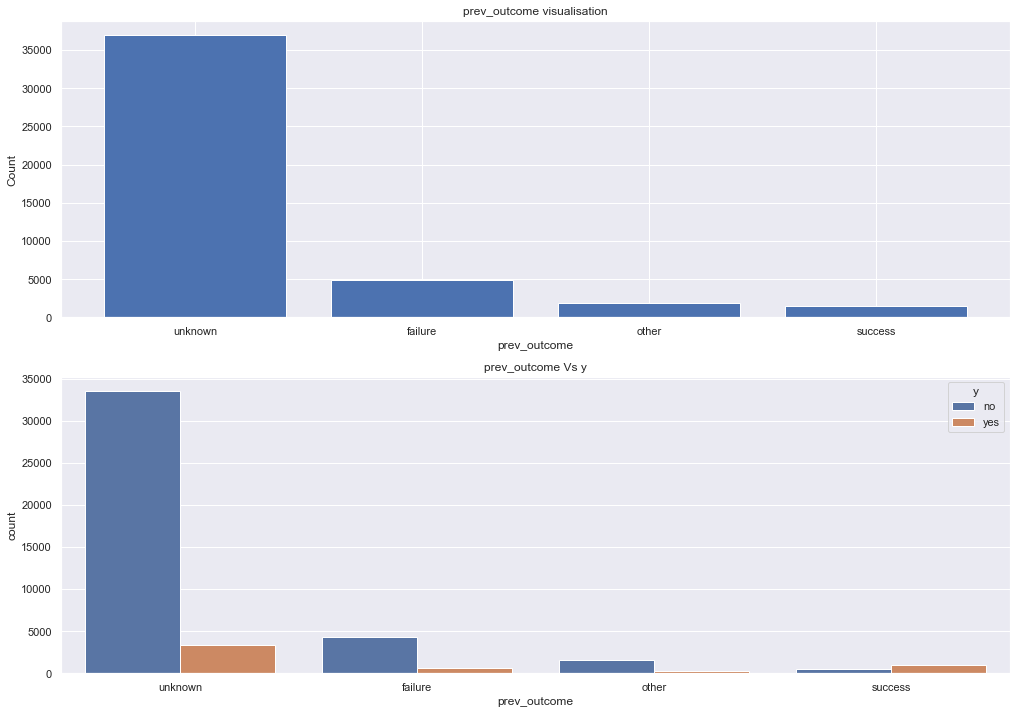

In [264]:
visualisation('prev_outcome','y')

In [265]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [266]:
data['job']= label_encoder.fit_transform(data['job']) 
data['marital']= label_encoder.fit_transform(data['marital']) 
data['mon']= label_encoder.fit_transform(data['mon']) 
data['call_type']= label_encoder.fit_transform(data['call_type']) 
data['education_qual']= label_encoder.fit_transform(data['education_qual']) 
data['prev_outcome']= label_encoder.fit_transform(data['prev_outcome']) 
data['y']= label_encoder.fit_transform(data['y']) 

In [267]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,4,1,2,2,5,8,261,1,3,0
1,44,9,2,1,2,5,8,151,1,3,0
2,33,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,2,5,8,92,1,3,0
4,33,11,2,3,2,5,8,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,17,9,977,3,3,1
45207,71,5,0,0,0,17,9,456,2,3,1
45208,72,5,1,1,0,17,9,1127,5,2,1
45209,57,1,1,1,1,17,9,508,4,3,0


## ML Models

In [268]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

from sklearn.tree import plot_tree

In [269]:
X = data.drop('y',axis=1).values
y = data['y'].values

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [271]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [272]:
Logistic = LogisticRegression()
Logistic.fit(X_train_scaled,y_train)

LogisticRegression()

In [273]:

y_pred = Logistic.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
rocauc_score=roc_auc_score(y_test, Logistic.predict_proba(X_test_scaled)[:, 1])

print(" Logistic Accuracy :",round(accuracy * 100 ,2))
print(" Logistic rocauc_score :",round(rocauc_score * 100 ,2))

 Logistic Accuracy : 88.93
 Logistic rocauc_score : 84.74


### XG-Boost Model

In [274]:
xg_scores=[]

for i in [0.1,0.13,0.15,0.17,0.19,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]:
    
    cv_xg=xgb.XGBClassifier(learning_rate=i, n_estimators =100, verbosity=0)
    cv_xg.fit(X_train_scaled,y_train)
    
    score=cross_val_score(cv_xg,X_train_scaled, y_train,cv=5)
    
    xg_scores.append({'Learning rate' : i, 'Cross_val_Score': np.mean(score).round(5)})

In [275]:
xg_scores

[{'Learning rate': 0.1, 'Cross_val_Score': 0.90456},
 {'Learning rate': 0.13, 'Cross_val_Score': 0.9057},
 {'Learning rate': 0.15, 'Cross_val_Score': 0.90595},
 {'Learning rate': 0.17, 'Cross_val_Score': 0.90592},
 {'Learning rate': 0.19, 'Cross_val_Score': 0.90554},
 {'Learning rate': 0.2, 'Cross_val_Score': 0.90567},
 {'Learning rate': 0.3, 'Cross_val_Score': 0.90671},
 {'Learning rate': 0.4, 'Cross_val_Score': 0.90665},
 {'Learning rate': 0.5, 'Cross_val_Score': 0.9069},
 {'Learning rate': 0.6, 'Cross_val_Score': 0.90358},
 {'Learning rate': 0.7, 'Cross_val_Score': 0.90481},
 {'Learning rate': 0.8, 'Cross_val_Score': 0.90377},
 {'Learning rate': 0.9, 'Cross_val_Score': 0.90301},
 {'Learning rate': 1, 'Cross_val_Score': 0.9039},
 {'Learning rate': 1.5, 'Cross_val_Score': 0.89075},
 {'Learning rate': 2, 'Cross_val_Score': 0.85144}]

In [276]:
df_xg_scores=pd.DataFrame(xg_scores,columns=['Learning rate','Cross_val_Score'])
df_xg_scores.loc[df_xg_scores['Cross_val_Score'].idxmax()]

Learning rate      0.5000
Cross_val_Score    0.9069
Name: 8, dtype: float64

* **Learning rate 0.5 gives best results 0.9069 in XGBoost Model**

In [277]:
# XGBoost Model 

model_xg = xgb.XGBClassifier(learning_rate=0.7, n_estimators =100, verbosity=0)
model_xg.fit(X_train_scaled,y_train)


XGBClassifier(learning_rate=0.7, verbosity=0)

In [278]:
print("XGBoost Model rocauc_score :",round(roc_auc_score(y_test, model_xg.predict_proba(X_test_scaled)[:, 1])* 100,2))

XGBoost Model rocauc_score : 92.6


### K Nearest Neighbours Model

In [279]:
KNN_scores=[]

for i in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_scaled,y_train)
    
    score=cross_val_score(KNN,X_train_scaled, y_train,cv=5)
    
    Knn_scores.append({'n_neighbors' : i, 'Cross_val_Score': np.mean(score).round(5)})

In [280]:
KNN_scores

[]

In [281]:
df_Knn_scores=pd.DataFrame(Knn_scores,columns=['n_neighbors','Cross_val_Score'])
df_Knn_scores.loc[df_Knn_scores['Cross_val_Score'].idxmax()]

n_neighbors        2.00000
Cross_val_Score    0.89059
Name: 0, dtype: float64

In [282]:
# KNN Model 

KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train_scaled,y_train)
    
score=cross_val_score(KNN,X_train_scaled, y_train,cv=5)

 KNN Accuracy : 88.93
 KNN rocauc_score : 58.59


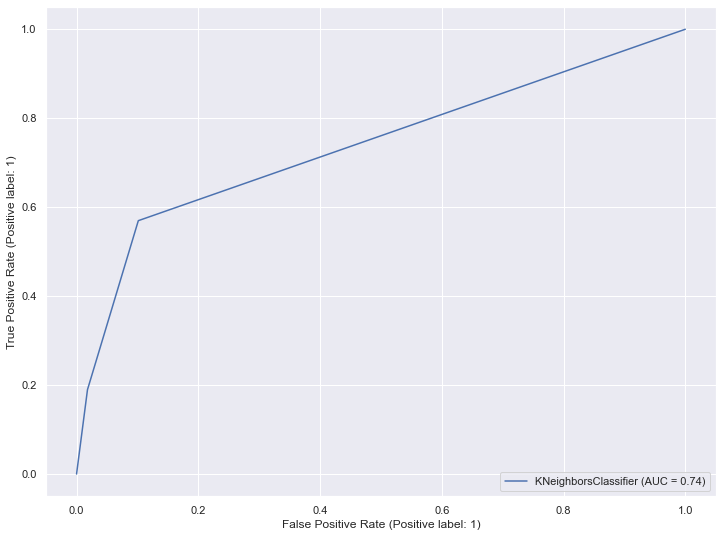

In [283]:
y_pred = knn.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)
rocauc_score = roc_auc_score(y_test, y_pred)

print(" KNN Accuracy :",round(accuracy * 100 ,2))
print(" KNN rocauc_score :",round(rocauc_score * 100 ,2))
plot_roc_curve(knn, X_test_scaled, y_test)
plt.show()

* **2 n_neighbors gives best result 0.89059 in KNN Model**

### Decision Tree Classifier Model

In [284]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [285]:
y_pred = dt.predict(X_test_scaled) 
accuracy = accuracy_score(y_test, y_pred)
rocauc_score = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])
print(" Decision Tree Accuracy :",round(accuracy * 100 ,2))
print(" Decision Tree rocauc_score :",round(rocauc_score * 100 ,2))

 Decision Tree Accuracy : 87.05
 Decision Tree rocauc_score : 69.14


### Feature importance using Decision Tree

In [286]:
feature_importances = dt.feature_importances_

<AxesSubplot:>

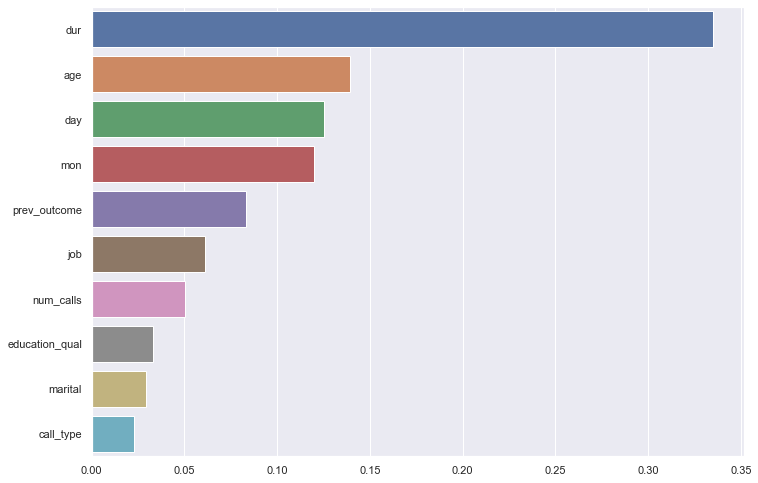

In [287]:

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = data.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)

* **Important features for Customer Conversion is Duration ,Age,day and month**

In [288]:
# Ploting the tree diagram

In [289]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

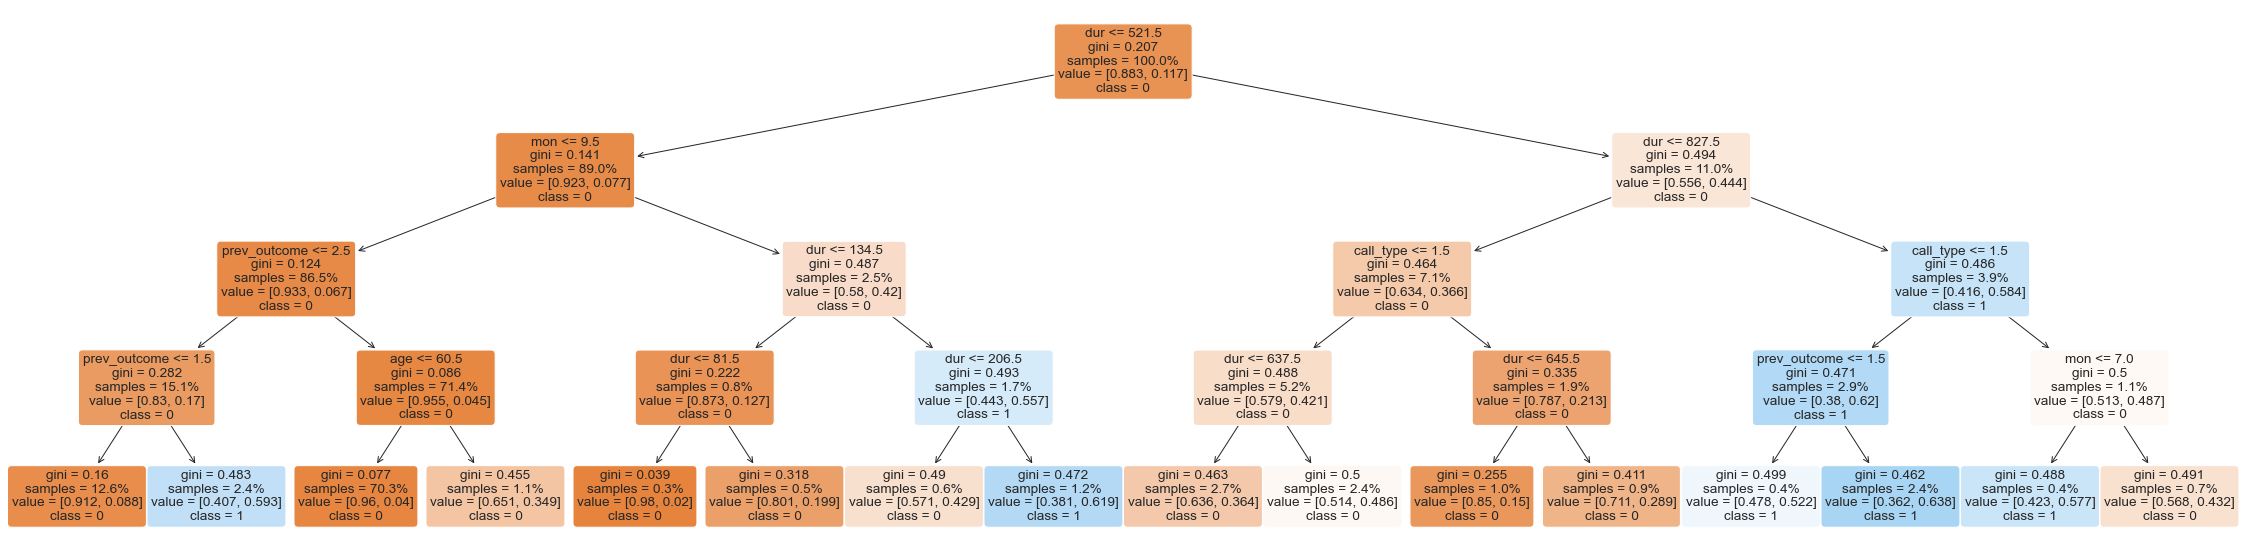

In [290]:
plt.figure(figsize=(40, 10))
plot_tree(dt,
          feature_names=data.columns[:-1],
          class_names=['0','1'],
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True);

### Random Forest Classifier Model

In [291]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 4)

rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=4)

In [292]:
y_pred = dt.predict(X_test_scaled) 
accuracy = accuracy_score(y_test, y_pred)
rocauc_score = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
print(" Random Forest Accuracy :",round(accuracy * 100 ,2))
print(" Random Forest rocauc_score :",round(rocauc_score * 100 ,2))

 Random Forest Accuracy : 88.3
 Random Forest rocauc_score : 88.52


## Conclusion

### ML Model AUROC Score

* XGBoost               : **91%**
* Random Forest         : **89%**
* Logistic regression   : **85%**
* Decision Tree         : **70%**
* KNN Model             : **59%**

* **Important features for Customer Conversion is Duration ,Age,day and month**

<AxesSubplot:>

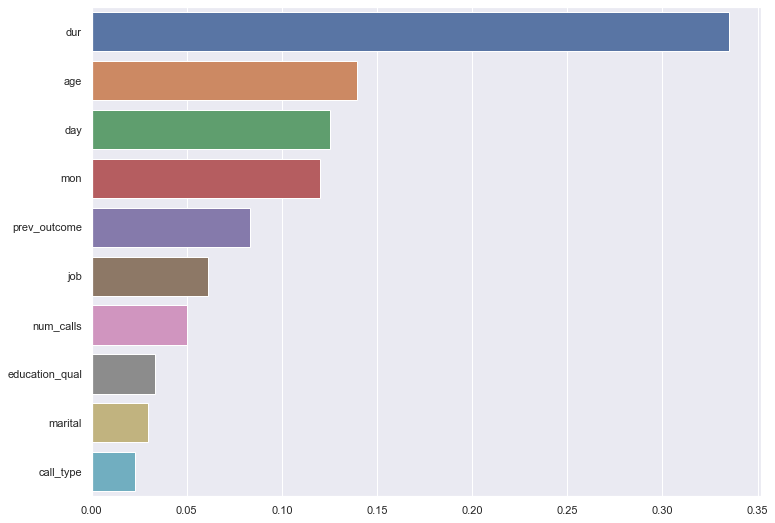

In [293]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(sorted_importances, sorted_feature_names)